<a href="https://colab.research.google.com/github/HammadN98/Curso_Estatistica/blob/main/S10Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graficos

In [1]:
#Importacoes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bases de Dados

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Curso_Estatistica/main/dados/census.csv")
dados.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Grafico de Dispersao

Usado para quando se quer encontrar relacionamento entre duas variaveis

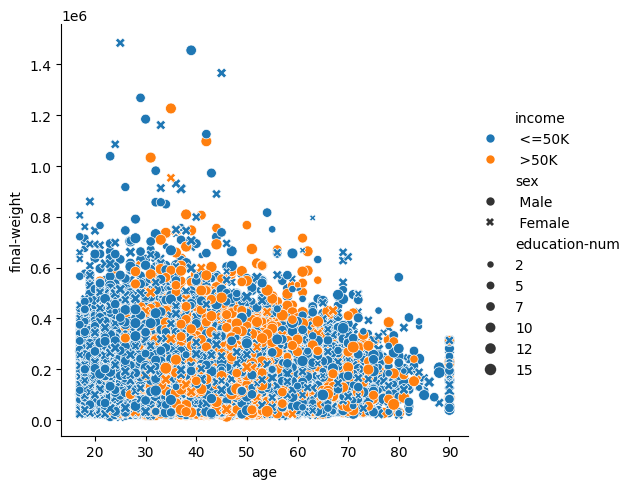

In [3]:
sns.relplot(x='age', y='final-weight', data=dados,
            hue= 'income', style='sex', size= 'education-num')
# hue= divisao pela categoria, style = tipo de ponto, size= tamanha dos pontos

### Grafico de Barra e Setor(Pizza)

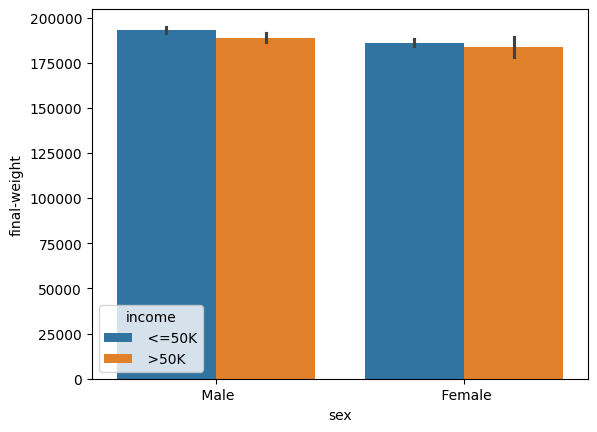

In [6]:
sns.barplot(x='sex', y='final-weight', data=dados, hue='income');

In [5]:
#Para gerar graficos de setor deve ter algum tipo de agrupamento
dados_agrupados = dados.groupby(['income'])['education-num'].sum()
dados_agrupados

,education-num
income,
<=50K,237190
>50K,91047


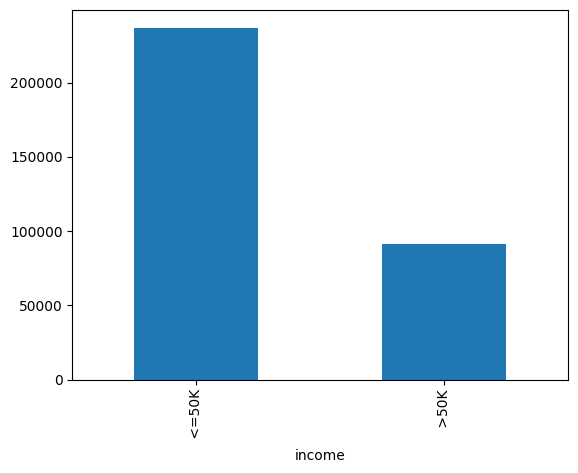

In [7]:
dados_agrupados.plot.bar();

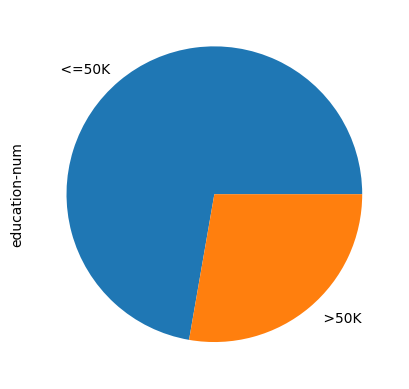

In [8]:
dados_agrupados.plot.pie();

### Graficode linha

* Usar para tempo

In [11]:
vendas = {'mes':np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
          'valor' : np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])}

In [12]:
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


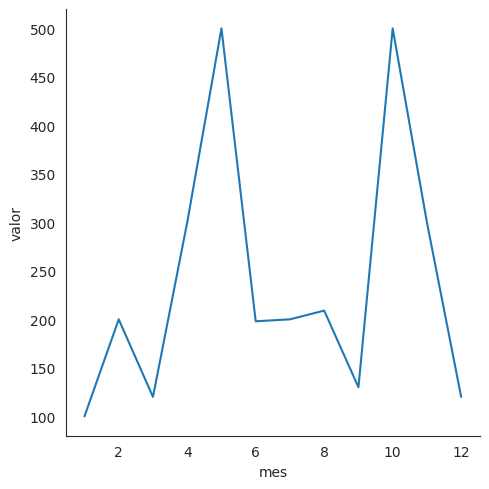

In [17]:
sns.set_style("white")
sns.relplot(x='mes', y='valor', kind='line', data=vendas_df)


### Boxplot

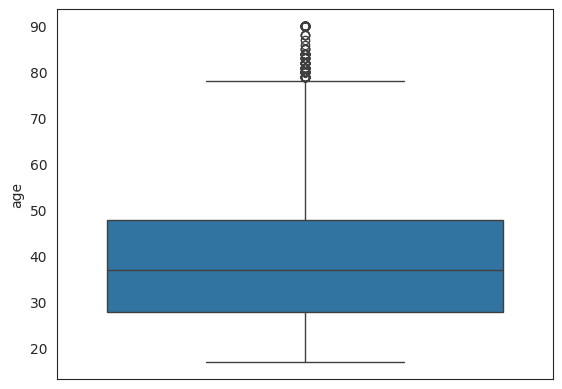

In [20]:
sns.boxplot(dados['age']);

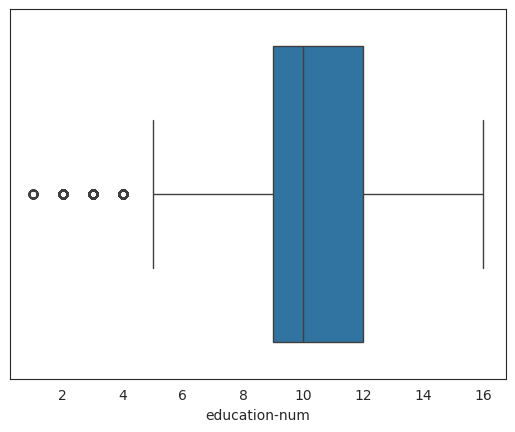

In [22]:
sns.boxplot(x=dados['education-num']);


In [25]:
dados2 = dados.iloc[:, [0, 4, 12]]
dados2.head(3)

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40


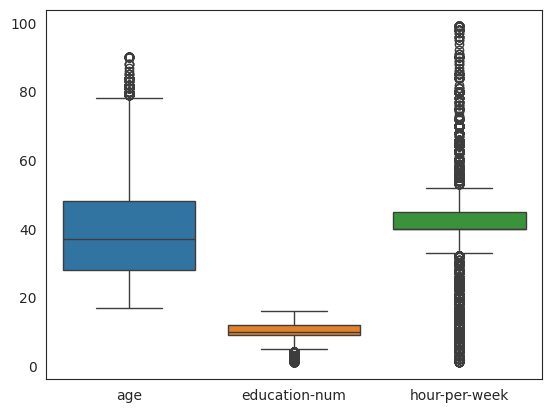

In [26]:
sns.boxplot(data=dados2);

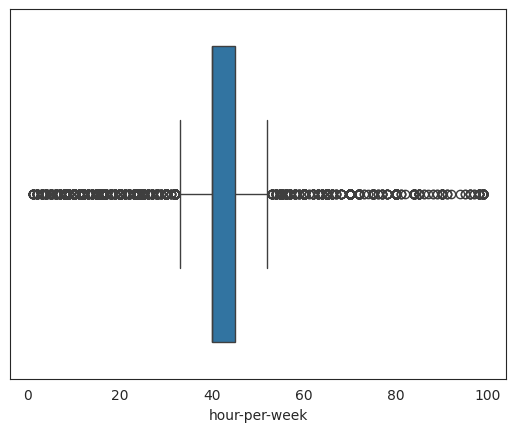

In [27]:
sns.boxplot(x=dados['hour-per-week']);


### Graficos com atributos categorios

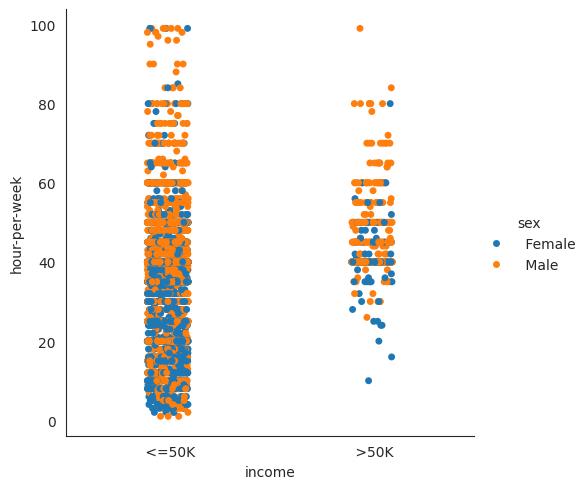

In [38]:
sns.catplot(x='income', y='hour-per-week',
            data=dados.query('age < 30'), hue='sex');

### Subgraficos

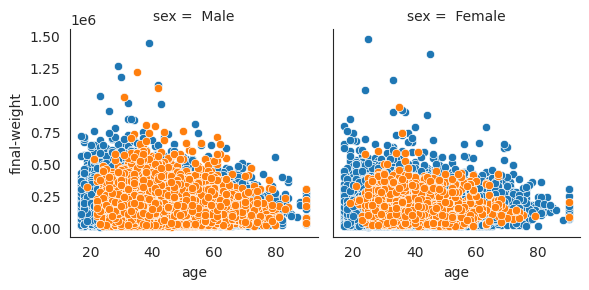

In [43]:
g = sns.FacetGrid(dados, col='sex', hue='income')
g.map(sns.scatterplot, 'age', 'final-weight')


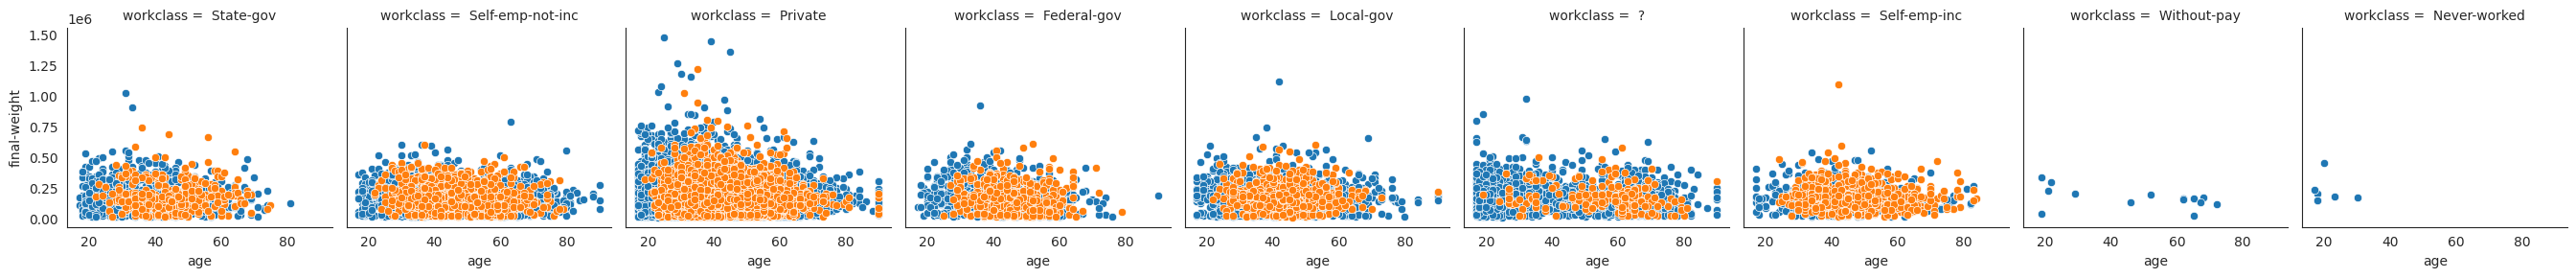

In [45]:
g = sns.FacetGrid(dados, col='workclass', hue='income')
g.map(sns.scatterplot, 'age', 'final-weight');



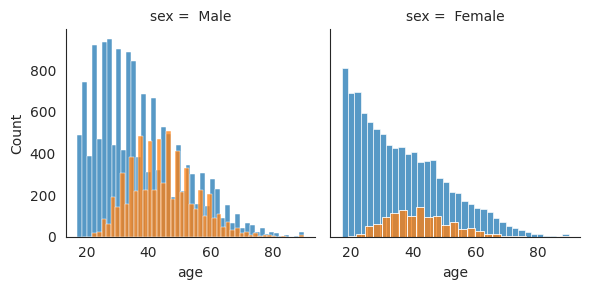

In [47]:
g = sns.FacetGrid(dados, col='sex', hue='income')
g.map(sns.histplot, 'age');

In [48]:
dados2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


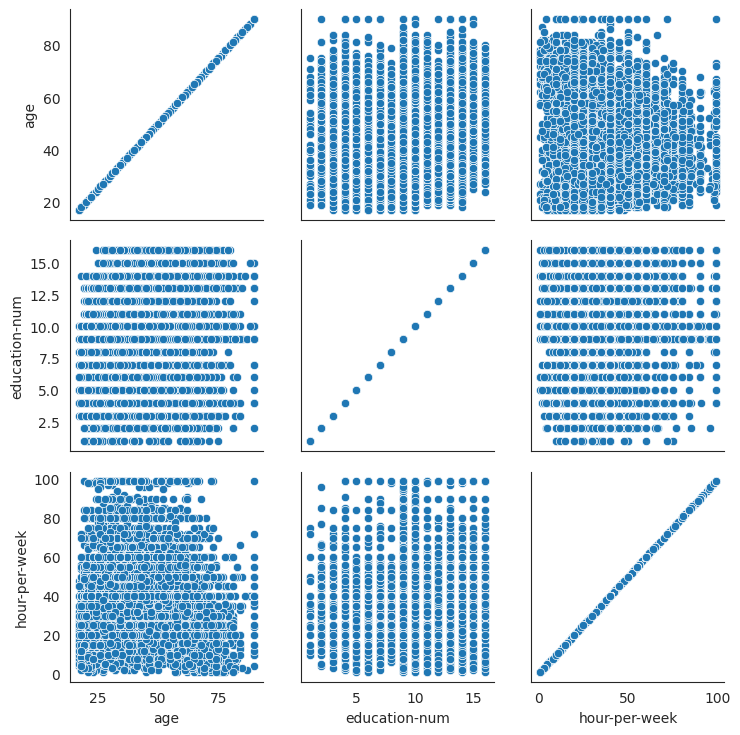

In [50]:
g = sns.PairGrid(dados2)
g.map(sns.scatterplot)

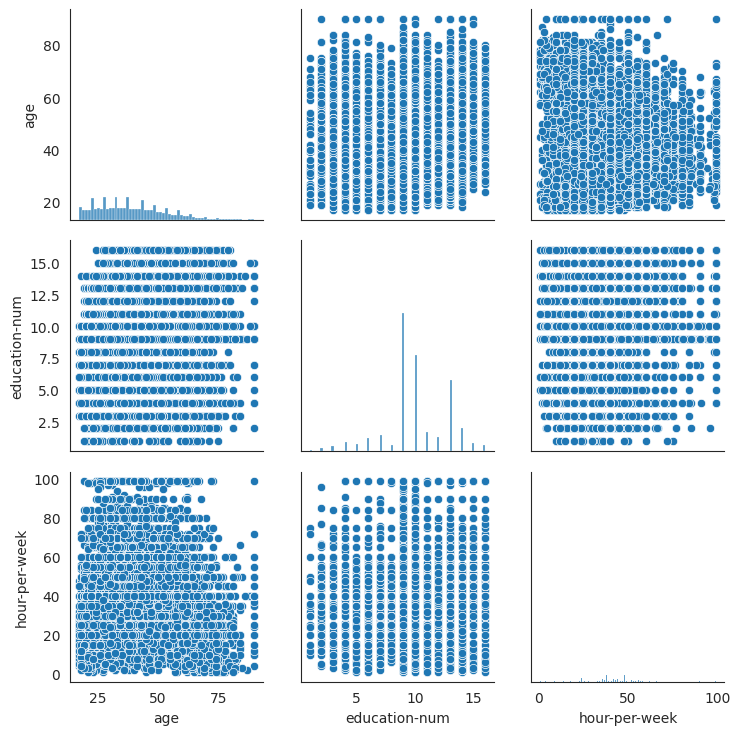

In [53]:
g = sns.PairGrid(dados2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);